In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
x = df.area
y = df.price

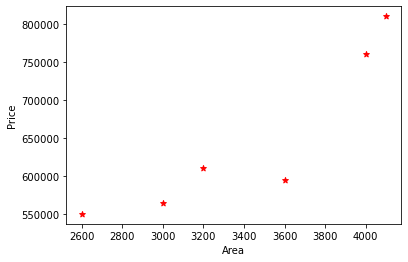

In [5]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(x,y,color="red", marker="*")
plt.show()

In [6]:
reg_train = linear_model.LinearRegression()
reg_train.fit(df[['area']], df['price'])

LinearRegression()

In [7]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4100


In [8]:
df.price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [34]:
reg_train.predict([[5000]]) #predicting one value

array([913240.11571842])

In [10]:
b = reg_train.intercept_

In [11]:
m = reg_train.coef_

In [12]:
x = 3000 # x is the value to be predicted
y=m*x+b
print(y)

[578621.02217936]


In [13]:
reg_train.predict(df[['area']])

array([511697.20347155, 578621.02217936, 612082.93153327, 679006.75024108,
       745930.56894889, 762661.52362584])

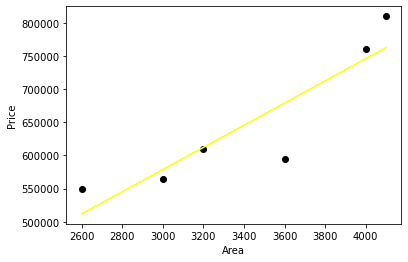

In [14]:
# comparing actual values with predicted ones in the plot
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df[['area']], df.price, color="black")
plt.plot(df[['area']], reg_train.predict(df[['area']]), color="yellow")

In [15]:
# Predicting the prices from another file's data

In [16]:
new_df = pd.read_csv('areas.csv')
new_df[['area']]

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [17]:
new_prediction = reg_train.predict(new_df[['area']])

In [18]:
new_prediction # predicted values/prices

array([ 244001.92864031,  327656.70202507,  461504.33944069,
        668968.17743491,  766007.71456123,  839623.91513983,
        995221.79363549,  655583.41369335,  871412.72902604,
        461504.33944069, 1582478.30279653, 1515554.48408872,
       1264590.16393443])

In [19]:
new_df[['price']] = new_prediction

In [20]:
new_df

,area,price
0,1000,2.440019e+05
1,1500,3.276567e+05
2,2300,4.615043e+05
3,3540,6.689682e+05
4,4120,7.660077e+05
5,4560,8.396239e+05
6,5490,9.952218e+05
7,3460,6.555834e+05
8,4750,8.714127e+05
9,2300,4.615043e+05


In [21]:
new_df.to_csv('areas.csv', index=False)

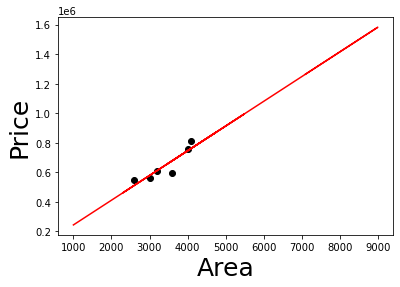

In [22]:
# comparing actual values with predicted ones in the plot
plt.xlabel("Area", fontsize = 25)
plt.ylabel("Price", fontsize = 25)
plt.scatter(df[['area']], df.price, color="black")
plt.plot(new_df[['area']], new_prediction, color="red")

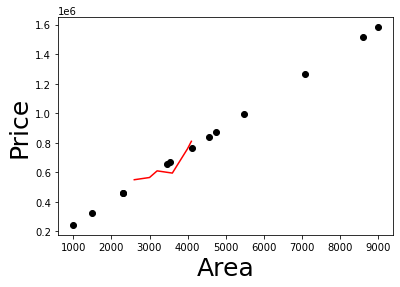

In [23]:
# comparing actual values with predicted ones in the plot
plt.xlabel("Area", fontsize = 25)
plt.ylabel("Price", fontsize = 25)
plt.scatter(new_df[['area']], new_prediction, color="black")
plt.plot(df[['area']], df.price, color="red")

In [27]:
# Saving trained model in pickle format
import pickle

with open('homeprices_pickel', 'wb') as f:
    pickle.dump(reg_train, f)

In [33]:
# Loading saved pickle model to use for prediction
with open('homeprices_pickel', 'rb') as f:
    mp = pickle.load(f)

mp.predict([[5000]])

array([913240.11571842])

In [43]:
# Saving trained model in joblib format
import joblib
joblib.dump(reg_train, "homeprices_joblib")

['homeprices_joblib']

In [47]:
# Loading saved joblib model to use for prediction
mj = joblib.load("homeprices_joblib")
mj.predict([[5000]])

array([913240.11571842])